In [5]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import pandas as pd
import statsmodels.api as sm
import scipy as sp

## 스케일링과 변수 변환
- 회귀분석에 사용되는 데이터는 그 자체로 사용하기 보다는 스케일링이나 함수 변환 등의 전처리 과정을 거치는 경우가 많다.
- 공분산 행렬의 조건을 향상시키거나 데이터 간의 관계를 선형 모형에 맞게 바꾸기 위해 사용된다.

### 조건수
- 공분산 행렬의 가장 큰 고유치와 가장 작은 고유치의 비율을 뜻하며 조건수가 크면 역행렬을 계산할 때 오차가 미치는 영향이 커진다.

In [17]:
A = np.eye(4)

In [21]:
b = np.ones(4)
np.linalg.cond(A)

1.0

In [22]:
sp.linalg.solve(A,b)

array([1., 1., 1., 1.])

In [19]:
sp.linalg.solve(A + 0.0001*np.eye(4) , b)

array([0.99990001, 0.99990001, 0.99990001, 0.99990001])

In [23]:
A = sp.linalg.hilbert(4)
A

array([[1.        , 0.5       , 0.33333333, 0.25      ],
       [0.5       , 0.33333333, 0.25      , 0.2       ],
       [0.33333333, 0.25      , 0.2       , 0.16666667],
       [0.25      , 0.2       , 0.16666667, 0.14285714]])

In [24]:
np.linalg.cond(A)

15513.738738929038

In [25]:
sp.linalg.solve(A,b)

array([  -4.,   60., -180.,  140.])

In [26]:
sp.linalg.solve(A + 0.0001*np.eye(4) , b)

array([ -0.58897672,  21.1225671 , -85.75912499,  78.45650825])

- 변수들의 단위 차이로 인해 숫자의 스케일이 크게 달라지는 경우, 이 경우에는 스케일링(scaling)으로 해결한다.
- 다중 공선성(multicollinearity) 즉 상관관계가 큰 독립 변수들이 있는 경우, 이 경우에는 변수 선택이나 PCA를 사용한 차원 축소 등으로 해결한다.

In [32]:
from sklearn.datasets import load_boston
boston = load_boston()
dfX = pd.DataFrame(boston.data,columns=boston.feature_names)
dfy = pd.DataFrame(boston.target,columns=['MEDV'])
df = pd.concat([dfX,dfy],axis=1)
model1 = sm.OLS.from_formula("MEDV ~ "
                             "CRIM + ZN + INDUS + NOX + RM + AGE + "
                             "DIS + RAD + TAX + PTRATIO + B + LSTAT + CHAS", 
                             data=df)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 02 Jul 2018   Prob (F-statistic):          6.95e-135
Time:                        17:37:59   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.0

In [31]:
model2 = sm.OLS.from_formula("MEDV ~ "
                             "scale(CRIM) + scale(ZN) + scale(INDUS) + scale(NOX) + scale(RM) + scale(AGE) + "
                             "scale(DIS) + scale(RAD) + scale(TAX) + scale(PTRATIO) + scale(B) + scale(LSTAT) + CHAS", 
                             data=df)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 02 Jul 2018   Prob (F-statistic):          6.95e-135
Time:                        17:37:45   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         22.3468      0.219    101.

### 변수 변환
- 다음과 같은 경우에는 로그 함수 혹은 제곱근 함수 등을 사용하여 변환된 변수를 사용하면 회귀 성능이 향상될 수 있다.
    - 독립 변수나 종속 변수가 심하게 한쪽으로 치우친 분포를 보이는 경우
    - 독립 변수나 종속 변수간의 관계가 곱셈 혹은 나눗셈으로 연결된 경우
    - 종속 변수와 예측치가 비선형 관계를 보이는 경우

In [33]:
model3 = sm.OLS.from_formula("np.log(MEDV) ~ "
                             "scale(CRIM) + scale(I(CRIM ** 2)) + "
                             "scale(ZN) + scale(I(ZN ** 2)) + "
                             "scale(INDUS) + "
                             "scale(NOX) + scale(RM) + scale(AGE) + "
                             "scale(np.log(DIS)) + scale(RAD) + scale(TAX) + "
                             "scale(np.log(PTRATIO)) + scale(B) + scale(np.log(LSTAT)) + CHAS", 
                             data=df)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(MEDV)   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     145.4
Date:                Mon, 02 Jul 2018   Prob (F-statistic):          1.97e-169
Time:                        17:39:52   Log-Likelihood:                 164.24
No. Observations:                 506   AIC:                            -296.5
Df Residuals:                     490   BIC:                            -228.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3

In [34]:
# 아웃라이어 제거
influence3 = result3.get_influence()
cooks_d2, pvals = influence3.cooks_distance
fox_cr = 4 / (len(df) - 2)
idx_outlier = np.where(cooks_d2 > fox_cr)[0]
# MEDV = 50 제거
idx_outlier = np.hstack([idx_outlier, np.where(boston.target == 50)[0]])
idx_outlier


array([  7,  54, 148, 152, 160, 214, 253, 267, 364, 365, 367, 368, 369,
       371, 372, 374, 380, 385, 397, 398, 399, 400, 401, 405, 409, 410,
       412, 413, 414, 415, 416, 418, 419, 426, 445, 489, 490, 492, 505,
       161, 162, 163, 166, 186, 195, 204, 225, 257, 267, 283, 368, 369,
       370, 371, 372])

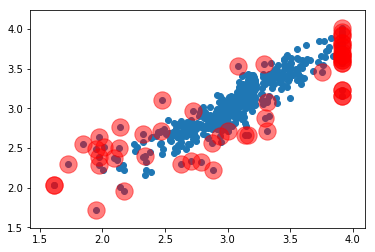

In [35]:
pred = result3.predict(df)
ax = plt.subplot()
plt.scatter(np.log(dfy), pred)
plt.scatter(np.log(dfy.MEDV[idx_outlier]), pred[idx_outlier], s=300, c="r", alpha=0.5)
plt.show()

In [36]:
idx = list(set(range(len(df))).difference(idx_outlier))
df4 = df.iloc[idx, :].reset_index(drop=True)

In [37]:
model4 = sm.OLS.from_formula("np.log(MEDV) ~ "
                             "scale(CRIM) + scale(I(CRIM ** 2)) + "
                             "scale(ZN) + scale(I(ZN ** 2)) + "
                             "scale(INDUS) + "
                             "scale(NOX) + scale(RM) + scale(AGE) + "
                             "scale(np.log(DIS)) + scale(RAD) + scale(TAX) + "
                             "scale(np.log(PTRATIO)) + scale(B) + scale(np.log(LSTAT)) + CHAS", 
                             data=df4)
result4 = model4.fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(MEDV)   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     199.9
Date:                Mon, 02 Jul 2018   Prob (F-statistic):          1.56e-185
Time:                        17:40:29   Log-Likelihood:                 317.45
No. Observations:                 456   AIC:                            -602.9
Df Residuals:                     440   BIC:                            -536.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3

### Multiconllinearity
- 다중공선성이란 독립 변수의 일부가 다른 독립 변수의 조합으로 표현될 수 있는 경우를 의미한다.
- 독립 변수들이 서로 독립이 아니라 상호상관관계가 강한 경우에 발생한다.

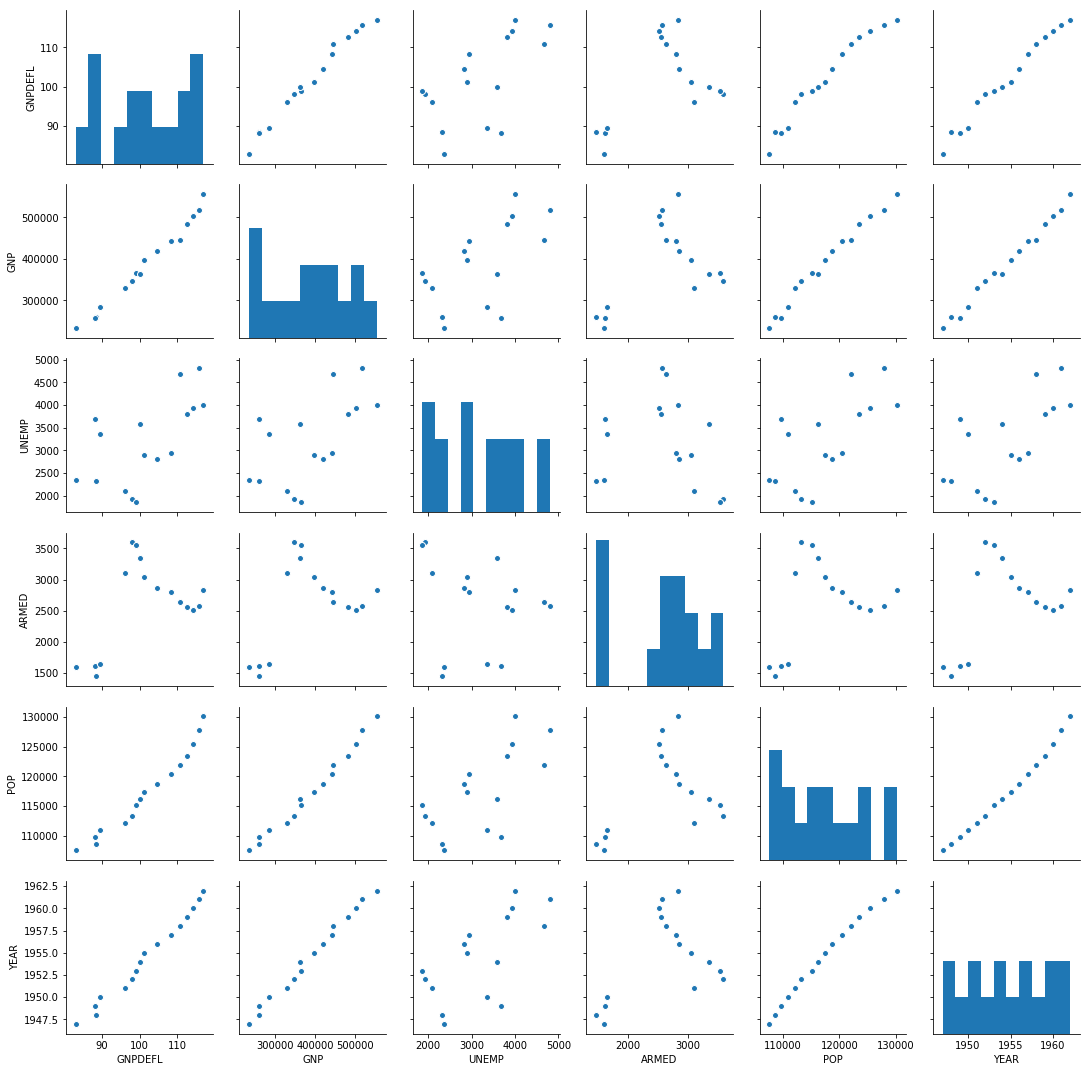

In [40]:
from statsmodels.datasets.longley import load_pandas
dfy = load_pandas().endog
dfX = load_pandas().exog
df = pd.concat([dfy,dfX],axis=1)
sns.pairplot(dfX)
plt.show()

In [41]:
dfX.corr()

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
GNPDEFL,1.000000,0.991589,0.620633,0.464744,0.979163,0.991149
GNP,0.991589,1.000000,0.604261,0.446437,0.991090,0.995273
UNEMP,0.620633,0.604261,1.000000,-0.177421,0.686552,0.668257
ARMED,0.464744,0.446437,-0.177421,1.000000,0.364416,0.417245
POP,0.979163,0.991090,0.686552,0.364416,1.000000,0.993953
YEAR,0.991149,0.995273,0.668257,0.417245,0.993953,1.000000


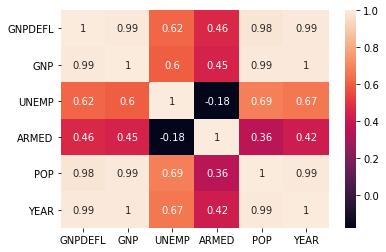

In [44]:
sns.heatmap(dfX.corr(),annot=True)
plt.show()

In [45]:
model = sm.OLS.from_formula("TOTEMP ~ "
                            "GNPDEFL + POP + GNP + "
                            "YEAR + ARMED + UNEMP", data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Mon, 02 Jul 2018   Prob (F-statistic):           4.98e-10
Time:                        17:45:20   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.482e+06    8.9e+05     -3.911      0.0

/home/hskimim/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


다중 공선성이 있으면 독립 변수의 공분산 행렬의 조건수가 증가한다. 조건수는 독립변수가 스케일링 되어 있지 않아도 증가하므로 일단 스케일링을 통해 조건수를 감소시킨다.

In [46]:
model = sm.OLS.from_formula("TOTEMP ~ "
                            "scale(GNPDEFL) + scale(POP) + scale(GNP) + "
                            "scale(YEAR) + scale(ARMED) + scale(UNEMP)", data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Mon, 02 Jul 2018   Prob (F-statistic):           4.98e-10
Time:                        17:46:04   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6.532e+04     76.214    857.

/home/hskimim/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


- 독립 변수가 서로 의존하게 되면 이른바 과최적화(overfitting)문제가 발생하여 회귀 결과의 안정성을 해치게 된다.
    - 변수 선택법으로 의존적인 변수 삭제
    - PCA
    - regularized

### VIF(variance inflation factor)
- 가장 의존적인 독립변수를 선택하는 방법
- 독립변수를 다른 독립변수로 선형회귀한 성능을 나타낸 것이다.
- `VIF = sigma^2 / (n-1)Var[X-i] * 1/(1-rsquared_i)`
- 여기에서 rsquared_i는 다른 변수로 i번째 변수를 선형회귀한 성능이다. 다른 변수에 의존적일 수록 VIF가 커진다.

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
vif = pd.DataFrame()
vif['VIF factor'] = [variance_inflation_factor(dfX.values , i) for i in range(dfX.shape[1])]
vif['features'] = dfX.columns
vif

,VIF factor,features
0,12425.514335,GNPDEFL
1,10290.435437,GNP
2,136.224354,UNEMP
3,39.983386,ARMED
4,101193.161993,POP
5,84709.950443,YEAR


상관계수와 VIF을 사용하여 독립 변수를 선택하면 (VIF factor를 보게 되면 UNEMP, ARMED, GMP 이 세가지 컬럼의 요소가 적게 나오는 것을 알 수 있다.) 더 적은 변수만으로 비슷한 수준의 성능이 나온다는 것을 알 수 있다.

In [50]:
model2 = sm.OLS.from_formula("TOTEMP ~ scale(GNP) + scale(ARMED) + scale(UNEMP)", data=df)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     264.4
Date:                Mon, 02 Jul 2018   Prob (F-statistic):           3.19e-11
Time:                        17:56:02   Log-Likelihood:                -119.16
No. Observations:                  16   AIC:                             246.3
Df Residuals:                      12   BIC:                             249.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     6.532e+04    119.824    545.106   

/home/hskimim/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


In [51]:
from sklearn.datasets import load_boston
boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)

from patsy import dmatrix

formula = "scale(CRIM) + scale(I(CRIM ** 2)) + " + \
    "scale(ZN) + scale(I(ZN ** 2)) + scale(INDUS) + " + \
    "scale(NOX) + scale(RM) + scale(AGE) + " + \
    "scale(np.log(DIS)) + scale(RAD) + scale(TAX) + " + \
    "scale(np.log(PTRATIO)) + scale(B) + scale(np.log(LSTAT)) + CHAS"
dfX = dmatrix(formula, dfX0, return_type="dataframe")
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

In [53]:
dfX.tail()

,Intercept,scale(CRIM),scale(I(CRIM ** 2)),scale(ZN),scale(I(ZN ** 2)),scale(INDUS),scale(NOX),scale(RM),scale(AGE),scale(np.log(DIS)),scale(RAD),scale(TAX),scale(np.log(PTRATIO)),scale(B),scale(np.log(LSTAT)),CHAS
501,1.0,-0.411157,-0.169025,-0.487722,-0.368889,0.115738,0.158124,0.439316,0.018673,-0.520096,-0.982843,-0.803212,1.095518,0.387217,-0.169811,0.0
502,1.0,-0.413178,-0.169028,-0.487722,-0.368889,0.115738,0.158124,-0.234548,0.288933,-0.668950,-0.982843,-0.803212,1.095518,0.441052,-0.274682,0.0
503,1.0,-0.411374,-0.169025,-0.487722,-0.368889,0.115738,0.158124,0.984960,0.797449,-0.768920,-0.982843,-0.803212,1.095518,0.441052,-1.067939,0.0
504,1.0,-0.405689,-0.169009,-0.487722,-0.368889,0.115738,0.158124,0.725672,0.736996,-0.588482,-0.982843,-0.803212,1.095518,0.403225,-0.836660,0.0
505,1.0,-0.412929,-0.169028,-0.487722,-0.368889,0.115738,0.158124,-0.362767,0.434732,-0.500440,-0.982843,-0.803212,1.095518,0.441052,-0.510809,0.0


In [54]:
dfy.tail()

,MEDV
501,22.4
502,20.6
503,23.9
504,22.0
505,11.9


In [55]:
idx_outlier = \
     np.array([  7,  54, 148, 152, 160, 214, 253, 267, 364, 365, 367, 368, 369,
               371, 372, 374, 380, 385, 397, 398, 399, 400, 401, 405, 409, 410,
               412, 413, 414, 415, 416, 418, 419, 426, 445, 489, 490, 492, 505,
               161, 162, 163, 166, 186, 195, 204, 225, 257, 267, 283, 368, 369,
               370, 371, 372])
    
idx = list(set(range(len(dfX))).difference(idx_outlier))
dfX = dfX.iloc[idx, :].reset_index(drop=True)
dfy = dfy.iloc[idx, :].reset_index(drop=True)

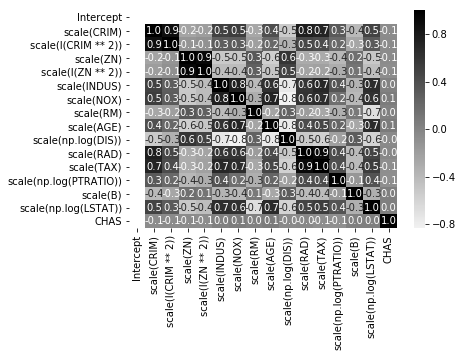

In [57]:
cmap = sns.light_palette("black", as_cmap=True)
sns.heatmap(dfX.corr(), annot=True, fmt='3.1f', cmap=cmap)
plt.show()

In [58]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX.values, i) for i in range(dfX.shape[1])]
vif["features"] = dfX.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,1.061624,CHAS
1,1.338325,scale(B)
2,1.489092,Intercept
3,1.780320,scale(np.log(PTRATIO))
4,2.596496,scale(RM)
5,3.748931,scale(AGE)
6,3.807459,scale(INDUS)
7,4.682812,scale(np.log(LSTAT))
8,5.071802,scale(NOX)
9,5.215025,scale(np.log(DIS))


In [59]:
model_boston1 = sm.OLS(np.log(dfy), dfX)
result_boston1 = model_boston1.fit()
print(result_boston1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     199.9
Date:                Mon, 02 Jul 2018   Prob (F-statistic):          1.56e-185
Time:                        18:12:59   Log-Likelihood:                 317.45
No. Observations:                 456   AIC:                            -602.9
Df Residuals:                     440   BIC:                            -536.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3

In [60]:
cols = ["Intercept", "CHAS", "scale(B)", "scale(CRIM)", 
        "scale(np.log(PTRATIO))", "scale(RM)", "scale(np.log(LSTAT))"]

model_boston2 = sm.OLS(np.log(dfy), dfX[cols])
result_boston2 = model_boston2.fit()
print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     380.7
Date:                Mon, 02 Jul 2018   Prob (F-statistic):          1.42e-172
Time:                        18:13:00   Log-Likelihood:                 260.52
No. Observations:                 456   AIC:                            -507.0
Df Residuals:                     449   BIC:                            -478.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3

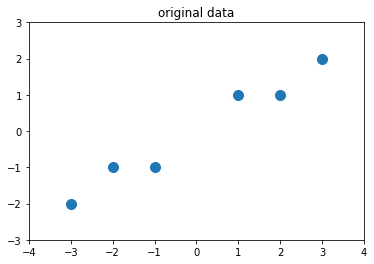

In [61]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
plt.scatter(X[:,0], X[:,1], s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("original data")
plt.show()

In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [63]:
Z = pca.transform(X)
Z

array([[ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385],
       [-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385]])

In [64]:
w, U = np.linalg.eig(pca.get_covariance())


In [65]:
U.T.dot(X.T).T


array([[-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385],
       [ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385]])

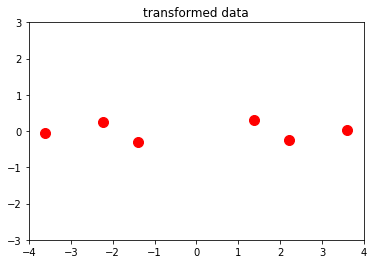

In [66]:
plt.scatter(Z[:,0], Z[:,1], c='r', s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("transformed data")
plt.show()

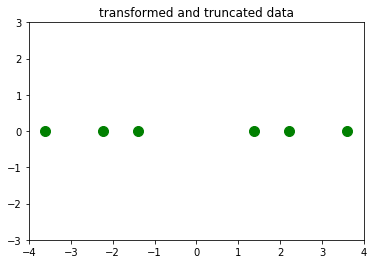

In [67]:
plt.scatter(Z[:,0], np.zeros_like(Z[:,1]), c='g', s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("transformed and truncated data")
plt.show()

In [ ]:
z = PCA(n_components=1).fit_transform(X)

plt.scatter(z, np.zeros_like(z), c='g', s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("transformed and truncated data")
plt.show()